In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.ensemble import AdaBoostRegressor
import random
import pickle as pkl

In [2]:
random.seed(24)

In [4]:
eco_fac = pd.read_csv('eco_china.csv')
eco_fac.head()

,GDP,FER
0,197.1,1.704542
1,203.3,1.892542
2,225.4,1.975675
3,250.7,2.320042
4,294.5,2.936658


In [5]:
df = pd.read_csv('weights_15.csv')
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,0.025855,0.125928,0.054118,0.067509,0.037793,0.062103,0.057768,0.093079,0.032104,0.069524,0.053799,0.089232,0.020576,0.195674,0.014940
1,0.024390,0.107464,0.049101,0.059169,0.034891,0.060548,0.056063,0.094063,0.027917,0.074106,0.045950,0.088189,0.022177,0.239667,0.016304
2,0.025450,0.076065,0.035598,0.047638,0.028261,0.041214,0.046687,0.079440,0.030794,0.057839,0.034091,0.071603,0.016388,0.389751,0.019181
3,0.026685,0.087435,0.042064,0.061242,0.031366,0.051220,0.059974,0.104375,0.038531,0.068460,0.035101,0.074283,0.016077,0.283385,0.019803
4,0.028514,0.077057,0.046638,0.060663,0.031233,0.060692,0.060507,0.107761,0.041098,0.076824,0.038589,0.085528,0.015696,0.251406,0.017794


In [6]:
df.isna().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
dtype: int64

In [7]:
new_fer = eco_fac.FER.shift(-1)
new_fer = pd.DataFrame(new_fer)
new_fer.rename(columns = {'FER':'NEXT_YR_FER'}, inplace=True)

In [8]:
data = pd.concat([eco_fac,new_fer],axis=1)
data.head()

,GDP,FER,NEXT_YR_FER
0,197.1,1.704542,1.892542
1,203.3,1.892542,1.975675
2,225.4,1.975675,2.320042
3,250.7,2.320042,2.936658
4,294.5,2.936658,3.452792


In [11]:
data = pd.concat([df,data],axis=1)
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,GDP,FER,NEXT_YR_FER
0,0.025855,0.125928,0.054118,0.067509,0.037793,0.062103,0.057768,0.093079,0.032104,0.069524,0.053799,0.089232,0.020576,0.195674,0.014940,197.1,1.704542,1.892542
1,0.024390,0.107464,0.049101,0.059169,0.034891,0.060548,0.056063,0.094063,0.027917,0.074106,0.045950,0.088189,0.022177,0.239667,0.016304,203.3,1.892542,1.975675
2,0.025450,0.076065,0.035598,0.047638,0.028261,0.041214,0.046687,0.079440,0.030794,0.057839,0.034091,0.071603,0.016388,0.389751,0.019181,225.4,1.975675,2.320042
3,0.026685,0.087435,0.042064,0.061242,0.031366,0.051220,0.059974,0.104375,0.038531,0.068460,0.035101,0.074283,0.016077,0.283385,0.019803,250.7,2.320042,2.936658
4,0.028514,0.077057,0.046638,0.060663,0.031233,0.060692,0.060507,0.107761,0.041098,0.076824,0.038589,0.085528,0.015696,0.251406,0.017794,294.5,2.936658,3.452792


In [12]:
data = data.dropna()

In [13]:
data.shape

(38, 18)

In [14]:
X = data.iloc[:,:-1]
y = data.iloc[:,-1]

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [16]:
minmax = MinMaxScaler()
scaler = StandardScaler()

In [17]:
X_s = scaler.fit_transform(X) # standard scaled data
X_m = minmax.fit_transform(X) # minmax scaled data

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=None)
X_train_s, X_test_s, y_train, y_test = train_test_split(X_s, y, test_size=0.2, random_state=None)
X_train_m, X_test_m, y_train, y_test = train_test_split(X_m, y, test_size=0.2, random_state=None)

In [19]:
# Change model here

from sklearn.model_selection import cross_val_score
score = cross_val_score(AdaBoostRegressor(learning_rate=0.1, loss="square", n_estimators=100), X_train, y_train, cv=5, scoring='neg_mean_squared_error')
score.mean()

-6.532580187394238

In [20]:
# Change model here

score = cross_val_score(AdaBoostRegressor(learning_rate=0.1, loss="square", n_estimators=100), X_train_m, y_train, cv=5, scoring='neg_mean_squared_error')
score.mean()

-1.0106705370299458

In [21]:
# Change model here

score = cross_val_score(AdaBoostRegressor(learning_rate=0.1, loss="square", n_estimators=100), X_train_s, y_train, cv=5, scoring='neg_mean_squared_error')
score.mean()

-6.463058563346325

In [29]:
def plot_feature_imp(model):
    importance = model.feature_importances_
    feat_imp = {}
    cols = data.columns[:-1]
    for i in range(len(cols)):
        feat_imp[cols[i]] = importance[i]
    plt.bar(list(feat_imp.keys()), list(feat_imp.values()))
    plt.show()

In [22]:
# Original 
model_orig = AdaBoostRegressor(learning_rate=0.1, loss="square", n_estimators=100) # change model here
model_orig.fit(X_train, y_train)
pred = model_orig.predict(X_test)
print('MSE :',mean_squared_error(pred, y_test))
print('R2 :',r2_score(pred,y_test))
print('Error : ',((y_test-pred)/y_test).mean())

MSE : 7.388603357886111
R2 : -3.7909210462316283
Error :  -0.11750567443990606


In [24]:
importance = model_orig.feature_importances_
for i in range(len(importance)):
    if importance[i]<0:
        importance[i] = -importance[i]
importance

array([0.19586643, 0.05599805, 0.14576568, 0.06345981, 0.04784985,
       0.02306027, 0.0356244 , 0.06343461, 0.04868787, 0.10001577,
       0.03568392, 0.04336435, 0.0375642 , 0.00954621, 0.05119068,
       0.03002513, 0.01286276])

In [25]:
feat_imp = {}
cols = data.columns[:-1]
for i in range(len(cols)):
    feat_imp[cols[i]] = importance[i]
feat_imp

{'0': 0.1958664317694829,
 '1': 0.055998049852152045,
 '2': 0.14576568376115176,
 '3': 0.0634598109258272,
 '4': 0.047849849943448194,
 '5': 0.023060268994411923,
 '6': 0.03562440399527053,
 '7': 0.06343461038069104,
 '8': 0.04868786935550761,
 '9': 0.10001577302032938,
 '10': 0.03568391732042765,
 '11': 0.04336434608345739,
 '12': 0.03756420486268592,
 '13': 0.009546213489481339,
 '14': 0.05119067699708258,
 'GDP': 0.030025134137633542,
 'FER': 0.012862755110959283}

<BarContainer object of 17 artists>

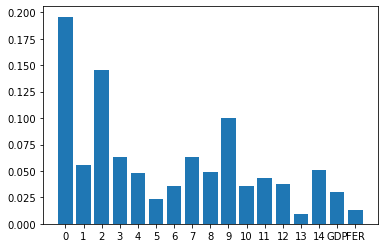

In [26]:
plt.bar(list(feat_imp.keys()), list(feat_imp.values()))

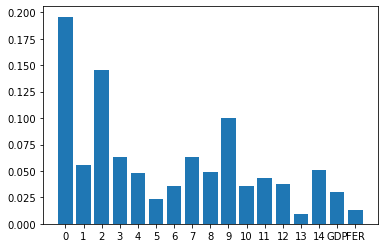

In [28]:
plot_feature_imp(model_orig)

In [69]:
(y_test-pred) # check the variations

9    -1.809280
36   -0.991575
15    2.685646
20    0.512644
22    1.387608
18    1.674205
30    0.103589
7    -2.880737
Name: NEXT_YR_FER, dtype: float64

In [70]:
# MinMax Scaled 
model_minmax = AdaBoostRegressor(learning_rate=0.1, loss="square", n_estimators=100) # Change model here
model_minmax.fit(X_train_m, y_train)
pred = model_minmax.predict(X_test_m)
print('MSE :',mean_squared_error(pred, y_test))
print('R2 :',r2_score(pred,y_test))
print('Error : ',((y_test-pred)/y_test).mean())

MSE : 0.09994640079564146
R2 : 0.9589578254972105
Error :  -0.011023561366494971


In [71]:
(y_test-pred) # check the variation

9    -0.854420
36   -0.043615
15    0.033452
20    0.032214
22    0.057318
18    0.033760
30   -0.032142
7     0.244989
Name: NEXT_YR_FER, dtype: float64

In [72]:
# Standard Scaled 
model_stand = AdaBoostRegressor(learning_rate=0.1, loss="square", n_estimators=100) # Change model here
model_stand.fit(X_train_s, y_train)
pred = model_stand.predict(X_test_s)
print('MSE :',mean_squared_error(pred, y_test))
print('R2 :',r2_score(pred,y_test))
print('Error : ',((y_test-pred)/y_test).mean())

MSE : 1.752108700300331
R2 : -4.373964913941851
Error :  -0.09192745118885819


In [73]:
(y_test-pred) # check the variations

9    -1.436018
36   -0.028521
15    0.682285
20    1.632480
22    0.247446
18    0.434133
30   -0.316126
7    -2.910974
Name: NEXT_YR_FER, dtype: float64

In [75]:
# Save the best perform ming model only after instructions

# pkl.dump(model_minmax, open('model_china.pkl','wb'))

In [76]:
# dont uncomment until said to
# if we use scaling
# pkl.dump(minmax, open('scaler_china.pkl','wb'))